<a href="https://colab.research.google.com/github/cristinarainich/DDCS/blob/main/Results_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
sns.set()

In [10]:
# put everything in a separate folder
working_path = Path('/content/drive/MyDrive/KKNV/data/tv')

In [11]:
cd /content/drive/MyDrive/KKNV/data/tv

/content/drive/MyDrive/KKNV/data/tv


In [12]:
!ls /content/drive/MyDrive/KKNV/data/tv

 dd06-Spoonerism_task-20240417-125112-XMNYC.log  'Temporal_Frequency_Final 13-06 17-Apr-2024'
'Temporal_Frequency_Final 12-59 17-Apr-2024'	 'Temporal_Frequency_Final 13-10 17-Apr-2024'
'Temporal_Frequency_Final 13-00 17-Apr-2024'	 'Temporal_Frequency_Final 13-14 17-Apr-2024'


In [165]:
def create_plots(data, plot, title):
  bar_width = 0.35
  positions = list(range(len(data['Subject'].unique()) * 2)) # Twice the number of subjects for two sessions
  # Create subplots
  fig, ax = plt.subplots(figsize=(4, 4))

  pastel_blue = '#AEC6CF'
  pastel_orange = '#FFB347'

  #session 1 = stimulation, session 2 = sham

  subjects = data['Subject'].unique()
  for i, subject in enumerate(subjects):
      session1_value = data[(data['Subject'] == subject) & (data['Session'] == 1)][plot].mean()
      session2_value = data[(data['Subject'] == subject) & (data['Session'] == 2)][plot].mean()

    # Plotting session values with different colors for different sessions
      ax.bar(i * 2 - bar_width/2, session1_value, bar_width, alpha=0.7, label=f'Stimulation' if i == 0 else "", color=pastel_blue)
      ax.bar(i * 2 + bar_width/2, session2_value, bar_width, alpha=0.7, label=f'Sham' if i == 0 else "", color=pastel_orange)

# Setting the y-axis label and the title
  ax.set_ylabel(plot)
  ax.set_title(title)

# Setting the position of the x ticks
  ax.set_xticks([i * 2 for i in range(len(subjects))])
  ax.set_xticklabels(subjects)

# Adding the legend and showing the plot
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

## RAN results



In [31]:
# PUT THE VALUES BELOW
# Group, session, RANletters Acc 1, RANletters Acc 2, RANletters RT 1, RANletters RT 2
# RANnumbers Acc 1, RANnumbers Acc 2, RANnumbers RT 1, RANnumbers RT 2
raw1 = ['Erik', 1, 0, 0, 18, 17, 1, 0, 15, 13] # stimulation
raw2 = ['Erik', 2, 0, 0, 21, 20, 0, 0, 17, 18] # sham
raw3 = ['Kristin', 1, 1, 1, 21, 25, 2, 0, 22, 21] # stimulation
raw4 = ['Kristin', 2, 2, 1, 19, 18, 2, 0, 21, 19] # sham

rows = []
rows.append(raw1)
rows.append(raw2)
rows.append(raw3)
rows.append(raw4)
column_names = ['Subject', 'Session', 'RANL ACC 1', 'RANL ACC 2', 'RANL RT 1', 'RANL RT 2', 'RANN ACC 1', 'RANN ACC 2', 'RANN RT 1', 'RANN RT 2']

In [32]:
df = pd.DataFrame(rows, columns=column_names)

In [33]:
df['AccL'] = 100 - df[['RANL ACC 1', 'RANL ACC 2']].mean(axis=1) * 100/50
df['AccN'] = 100 - df[['RANN ACC 1', 'RANN ACC 2']].mean(axis=1) * 100/50
df['RT L'] = df[['RANL RT 1', 'RANL RT 2']].mean(axis=1)
df['RT N'] = df[['RANN RT 1', 'RANN RT 1']].mean(axis=1)

In [34]:
df['Genauigkeit'] = df[['AccL', 'AccN']].mean(axis=1)
df['Reaktionszeit'] = df[['RT L', 'RT N']].mean(axis=1)

In [35]:
df

,Subject,Session,RANL ACC 1,RANL ACC 2,RANL RT 1,RANL RT 2,RANN ACC 1,RANN ACC 2,RANN RT 1,RANN RT 2,AccL,AccN,RT L,RT N,Genauigkeit,Reaktionszeit
0,Erik,1,0,0,18,17,1,0,15,13,100.0,99.0,17.5,15.0,99.5,16.25
1,Erik,2,0,0,21,20,0,0,17,18,100.0,100.0,20.5,17.0,100.0,18.75
2,Kristin,1,1,1,21,25,2,0,22,21,98.0,98.0,23.0,22.0,98.0,22.50
3,Kristin,2,2,1,19,18,2,0,21,19,97.0,98.0,18.5,21.0,97.5,19.75


In [27]:
df[['Subject', 'Session', 'AccL', 'AccN', 'RT L', 'RT N', 'Acc', 'RT']]

,Subject,Session,AccL,AccN,RT L,RT N,Acc,RT
0,Erik,1,100.0,99.0,17.5,15.0,99.5,16.25
1,Erik,2,100.0,100.0,20.5,17.0,100.0,18.75
2,Kristin,1,98.0,98.0,23.0,22.0,98.0,22.50
3,Kristin,2,97.0,98.0,18.5,21.0,97.5,19.75


KeyError: 'Genauigkeit'

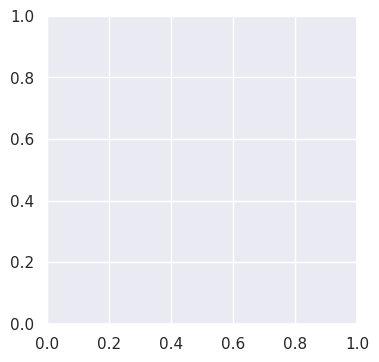

In [166]:
create_plots(df, 'Genauigkeit', 'Genauigkeit bei RAN-Buchstaben und -Zahlen (in %)')
create_plots(df, 'Reaktionszeit', 'Reaktionszeit bei RAN-Buchstaben und -Zahlen (in sec)')

## Spoonerism

For spoonerism, we have 20 trials with a slide of instruction in between. instruction slides - 10 with nouns - instrcution - 10 with verbs - end slide

In [68]:
# change the names of the files according to the format
# "Erik_stimulation.log", "Erik_sham.log"
# "Kristin_stimulation.log", "Kristin_sham.log"
file_names = [
    "Erik_stimulation.log", "Erik_sham.log",
    "Kristin_stimulation.log", "Kristin_sham.log"
]

In [107]:
# for reaction time
# session 1 = stimulation, session 2 = sham
all_data = pd.DataFrame()
for name in file_names:
  data = pd.read_csv(
        working_path.joinpath(name),
        delimiter='\t', skiprows=1, encoding='utf-8', on_bad_lines='skip')
  df = data.reset_index()
  df.columns = df.iloc[0]
  df = df.drop(0)
  df = df[['Subject', 'Trial', 'Time', 'TTime']]
  df = df.drop([1, 2, 3, 4, 5, 6, 7, 18, 29, 30], axis = 0) # recheck in the task!!!!
  if 'stimulation' in name:
    df['Session'] = 1
  elif 'sham' in name:
    df['Session'] = 2
  all_data = pd.concat([all_data, df])

In [126]:
all_data = all_data.rename({'TTime':'Reaktionszeit'}, axis=1)
all_data['Reaktionszeit'] = all_data['Reaktionszeit'].astype(int)

In [109]:
# simulation
subject1 = ['Erik'] * 40
subject2 = ['Kristin'] * 40
subject = subject1 + subject2

In [110]:
all_data['Subject'] = subject

In [161]:
# adding the accuracy results in the spoonerism task
erik_stim = [1] * 20
erik_sham = [1] * 20
kris_stim = [1] * 19 + [0]
kris_sham = [1] * 18 + [0] * 2
accuracy = erik_stim + erik_sham + kris_stim + kris_sham # exactly in this order

In [162]:
all_data['Genauigkeit'] = accuracy

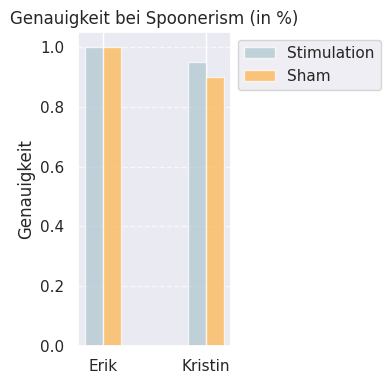

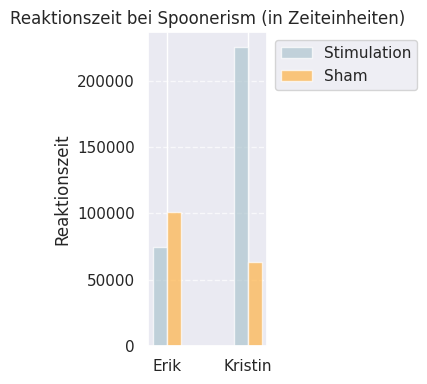

In [167]:
create_plots(all_data, 'Genauigkeit', 'Genauigkeit bei Spoonerism (in %)')
create_plots(all_data, 'Reaktionszeit', 'Reaktionszeit bei Spoonerism (in Zeiteinheiten)')

## Motion perception

In [168]:
!ls /content/drive/MyDrive/KKNV/data/tv

 Erik_sham.log				      'Temporal_Frequency_Final 13-00 17-Apr-2024'
 Erik_stimulation.log			      'Temporal_Frequency_Final 13-06 17-Apr-2024'
 Kristin_sham.log			      'Temporal_Frequency_Final 13-10 17-Apr-2024'
 Kristin_stimulation.log		      'Temporal_Frequency_Final 13-14 17-Apr-2024'
'Temporal_Frequency_Final 12-59 17-Apr-2024'


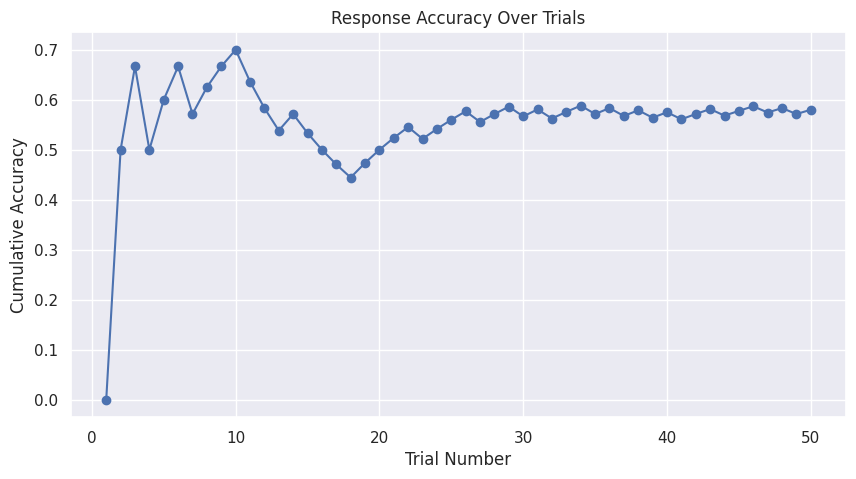

In [ ]:
# Example data
trials = list(range(1, 51))
intensities = [15, 14, 13, 14, 13, 12, 11, 10, 11, 12, 11, 10, 9, 10, 11, 10, 9, 8, 9, 8, 7, 6, 5, 6, 5, 4, 5, 4, 3, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2]

responses = np.random.choice([0, 1], size=50)  # 0 for incorrect, 1 for correct
accuracy = np.cumsum(responses) / np.arange(1, 51)

plt.figure(figsize=(10, 5))
plt.plot(trials, accuracy, marker='o', linestyle='-')
plt.xlabel('Trial Number')
plt.ylabel('Cumulative Accuracy')
plt.title('Response Accuracy Over Trials')
plt.grid(True)
plt.show()
